In [1]:
#라이브러리 임포트
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbCallback
from sklearn.preprocessing import LabelEncoder

W&B 커널에 설치하는 코드
- pip install wandb==0.16.0

In [3]:
#train 데이터 불러오기 및 확인
train_data_path ="~/aiffel/dktc/data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


### 기본적인 데이터 확인1

In [14]:
#클래스 갯수 확인
class_counts = train_data.groupby('class').size()
print(class_counts)

class
갈취 대화           981
기타 괴롭힘 대화      1094
직장 내 괴롭힘 대화     979
협박 대화           896
dtype: int64


In [15]:
train_data[train_data['class']=='협박 대화']

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
12,12,협박 대화,네네 무슨 일 때문에 전화주셨나요?\n우리 애가 지우개 하나 훔친거 가지고 애들 앞...
20,20,협박 대화,너가 민수라는 남자 제자니?\n네 맞는데요 왜 그러시죠? 혹시 저희 선생님께 무슨 ...
23,23,협박 대화,나좀 제발 그만 따라다녀.부탁이야\n너 만나려면 널 찾아가야될거아냐\n우리 헤어졌자...
...,...,...,...
3924,3924,협박 대화,때리지 말아줘\n 아퍼? 아프면 참아봐.\n나 이미 충분히 병원다니고 있어.\n병원...
3925,3925,협박 대화,오랜만이다. 여기 니 인질\n그래. 형이 무사히 다 빠져나가고 나면 그 다음에 이야...
3926,3926,협박 대화,아가씨 너희 집 어딘지 이제 아는데.\n 선생님 제발 우리 집에는 오지 마세요.\n...
3929,3929,협박 대화,안녕하세요 중고나라보고 문의드려요\n네 아이폰 50만원에 팔아요\n네 입금했습니다\...


In [16]:
# train da를 x,y로 분류

x_train = train_data['conversation']
y_train = train_data['class']

### 기본적인 데이터 확인 2

In [20]:
import matplotlib.pyplot as plt
# Colab에서 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import numpy as np
import pandas as pd
import seaborn as sns

데이터 정보
--------------------------------------------------
x_train : (3950,)
y_train : (3950,)
label 종류: {'갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화', '협박 대화'}
--------------------------------------------------
클래스의 수 : 4
--------------------------------------------------
훈련용 뉴스의 최대 길이 :874
훈련용 뉴스의 평균 길이 :226.57088607594937


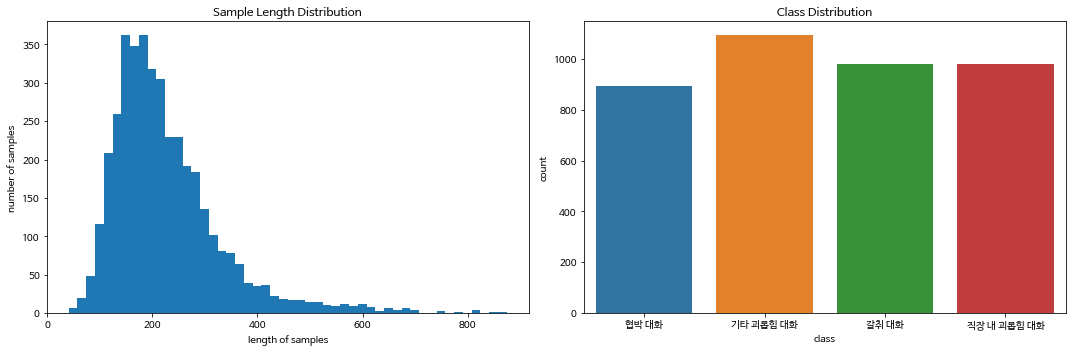

In [21]:
print('데이터 정보')
print('-'*50)
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('label 종류:', set(y_train))
print('-'*50)
num_classes = 4
print('클래스의 수 : {}'.format(num_classes))
print('-'*50)
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0].hist([len(s) for s in x_train], bins=50)
axes[0].set_xlabel('length of samples')
axes[0].set_ylabel('number of samples')
axes[0].set_title('Sample Length Distribution')

# Plot the count of each class
sns.countplot(x=y_train, ax=axes[1])
axes[1].set_title('Class Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

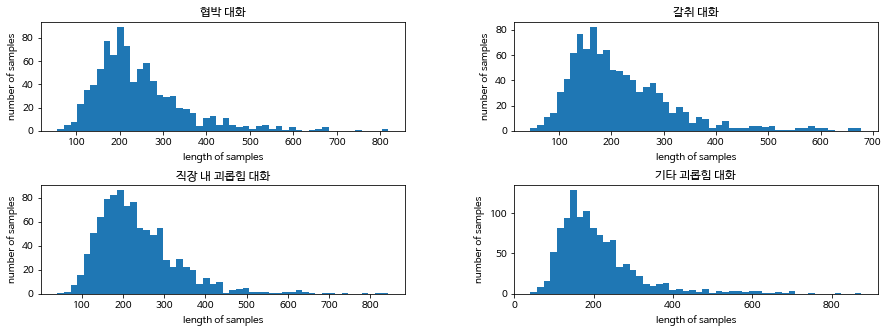

In [22]:
#데이터 클래스별 길이 분포 확인

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='협박 대화']], bins=50)
axes[0][0].set_xlabel('length of samples')
axes[0][0].set_ylabel('number of samples')
axes[0][0].set_title('협박 대화')

axes[0][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='갈취 대화']], bins=50)
axes[0][1].set_xlabel('length of samples')
axes[0][1].set_ylabel('number of samples')
axes[0][1].set_title('갈취 대화')

axes[1][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='직장 내 괴롭힘 대화']], bins=50)
axes[1][0].set_xlabel('length of samples')
axes[1][0].set_ylabel('number of samples')
axes[1][0].set_title('직장 내 괴롭힘 대화')

axes[1][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='기타 괴롭힘 대화']
], bins=50)
axes[1][1].set_xlabel('length of samples')
axes[1][1].set_ylabel('number of samples')
axes[1][1].set_title('기타 괴롭힘 대화')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

### EDA 시작

In [23]:
x_train[0]

'지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n 선택 못하겠습니다. 한번만 도와주세요.\n 그냥 다 죽여버려야겠군. 이의 없지?\n 제발 도와주세요.'

In [24]:
x_train[1000]

'우와 00아 너 이번에 올라온 사진 정말 예쁘더라.\n아 응 고마워!\n그래서 그 사진 보고 너가 입은 옷이랑 립스틱 따라 사고 싶은데 어디 제품인지 알려줄 수 있을까 ? 나 정말 너 좋아해서 따라하고 사진 찍고 싶어.\n어. 0000 여기 제품이야.\n우와 봤는데 너무 비싼 것 같아. 어차피 사진 한 번만 찍을 껀데 둘 다 빌려주면 안될까?\n아 그래. 빌려줄게.\n그러면 빌려주는 김에 전전 피드에 올린 옷도 같이 빌려줘!\n아 그거는 내가 사촌언니 이미 빌려줘서 못 빌려줄 것 같아.\n그래? 근데 나 진짜 너무 궁금한데 언니한테 얼른 다시 받아서 빌려주면 안될까? 너 엄청 착하잖아. 믿어도 되는거지?!\n알겠어.'

In [10]:
import re

def preprocess_sentence(sentence, s_token=False, e_token=False):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z가-힣?.!,]+", " ", sentence)

    sentence = sentence.strip()

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'
    
    return sentence

In [11]:
from konlpy.tag import Mecab
m = Mecab()

In [12]:
from tqdm import tqdm

corpus_kor = list()
for sentence_kor in tqdm(train_data['conversation']):
    corpus_kor.append(m.morphs(sentence_kor))

100%|██████████| 3950/3950 [00:05<00:00, 710.47it/s] 


In [13]:
print(corpus_kor[100])

['어', '이', '초딩', '.', '이리', '와봐', '누구', '세요', '이리', '와', '보', '라고', '자식', '아', '.', '죽', '고', '싶', '냐', '왜', '이러', '세요', '확', '!', '죽', '을래', '?', '조용히', '이리', '안', '와', '?', '무서워요', '돈', '얼마', '있', '어', '.', '다', '내놔', '봐', '.', '저', '돈', '없', '어요', '씨발', '.', '죽', '을래', '.', '너', '어디', '살', '아', '.', '가진', '거', '다', '내놔', '봐', '.', '왜', '이러', '세요', '산', '에', '가', '서', '확', '묻', '어', '버리', '기', '전', '에', '호주머니', '에', '있', '는', '거', '다', '내놔', '이러', '지', '마세요']


In [25]:
print(corpus_kor[0])

['지금', '너', '스스로', '를', '죽여', '달', '라고', '애원', '하', '는', '것', '인가', '?', '아닙니다', '.', '죄송', '합니다', '.', '죽', '을', '거', '면', '혼자', '죽', '지', '우리', '까지', '사건', '에', '휘말리', '게', '해', '?', '진짜', '죽여', '버리', '고', '싶', '게', '.', '정말', '잘못', '했', '습니다', '.', '너', '가', '선택', '해', '.', '너', '가', '죽', '을래', '네', '가족', '을', '죽여', '줄까', '.', '죄송', '합니다', '.', '정말', '잘못', '했', '습니다', '.', '너', '에게', '는', '선택', '권', '이', '없', '어', '.', '선택', '못', '한다면', '너', '와', '네', '가족', '까지', '모조리', '죽여', '버릴', '거', '야', '.', '선택', '못', '하', '겠', '습니다', '.', '한', '번', '만', '도와', '주', '세요', '.', '그냥', '다', '죽여', '버려야', '겠', '군', '.', '이', '의', '없', '지', '?', '제발', '도와', '주', '세요', '.']


In [26]:
print(corpus_kor[1000])

['우와', '00', '아', '너', '이번', '에', '올라온', '사진', '정말', '예쁘', '더라', '.', '아', '응', '고마워', '!', '그래서', '그', '사진', '보', '고', '너', '가', '입', '은', '옷', '이랑', '립스틱', '따라', '사', '고', '싶', '은데', '어디', '제품', '인지', '알려', '줄', '수', '있', '을까', '?', '나', '정말', '너', '좋', '아', '해서', '따라', '하', '고', '사진', '찍', '고', '싶', '어', '.', '어', '.', '0000', '여기', '제품', '이', '야', '.', '우와', '봤', '는데', '너무', '비싼', '것', '같', '아', '.', '어차피', '사진', '한', '번', '만', '찍', '을', '껀', '데', '둘', '다', '빌려', '주', '면', '안', '될까', '?', '아', '그래', '.', '빌려', '줄게', '.', '그러', '면', '빌려', '주', '는', '김', '에', '전전', '피드', '에', '올린', '옷', '도', '같이', '빌려', '줘', '!', '아', '그거', '는', '내', '가', '사촌', '언니', '이미', '빌려', '줘서', '못', '빌려줄', '것', '같', '아', '.', '그래', '?', '근데', '나', '진짜', '너무', '궁금', '한데', '언니', '한테', '얼른', '다시', '받', '아서', '빌려', '주', '면', '안', '될까', '?', '너', '엄청', '착하', '잖아', '.', '믿', '어도', '되', '는', '거', '지', '?', '!', '알', '겠', '어', '.']
